In [1]:
import pandas as pd
%matplotlib inline

In [2]:
csr_df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False,parse_dates=['Created Date','Closed Date'])

In [3]:
csr_df.shape

(300698, 53)

In [4]:
csr_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
csr_df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
300697,30281825,2015-03-29 00:33:01,2015-03-29 04:41:50,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


In [6]:
csr_df.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [7]:
from datetime import datetime as dt
import numpy as np

In [27]:
#csr_df['Request_Closing_Time']=csr_df['Created Date'].sub(csr_df['Closed Date'], axis=0)
csr_df['Request_Closing_Time(h)']=(csr_df['Closed Date']-csr_df['Created Date'])/np.timedelta64(1,'h')

In [9]:
csr_df['Request_Closing_Time(h)'].head()

0    0.920833
1    1.437778
2    4.858611
3    7.753889
4    3.450556
Name: Request_Closing_Time(h), dtype: float64

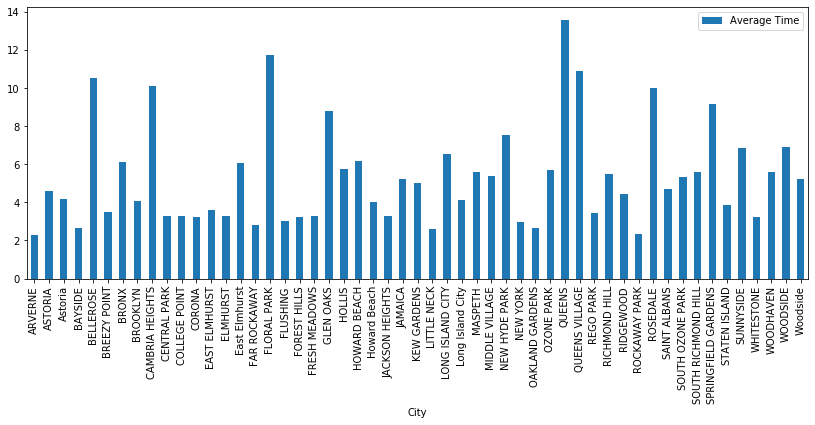

In [10]:
Citywise_grp=csr_df[['Request_Closing_Time(h)','City']].groupby('City')['Request_Closing_Time(h)'].agg(['mean']).reset_index()
Citywise_grp.rename(columns = {'mean':'Average Time'}, inplace = True)
Citywise_grp.plot(kind='bar',x='City',figsize=(14,5))

In [11]:
csr_df['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [12]:
csr_df[['Complaint Type','City','Descriptor','Agency','Request_Closing_Time(h)']]

,Complaint Type,City,Descriptor,Agency,Request_Closing_Time(h)
0,Noise - Street/Sidewalk,NEW YORK,Loud Music/Party,NYPD,0.920833
1,Blocked Driveway,ASTORIA,No Access,NYPD,1.437778
2,Blocked Driveway,BRONX,No Access,NYPD,4.858611
3,Illegal Parking,BRONX,Commercial Overnight Parking,NYPD,7.753889
4,Illegal Parking,ELMHURST,Blocked Sidewalk,NYPD,3.450556
...,...,...,...,...,...
300693,Noise - Commercial,NaN,Loud Music/Party,NYPD,NaN
300694,Blocked Driveway,RICHMOND HILL,Partial Access,NYPD,2.008611
300695,Noise - Commercial,BROOKLYN,Loud Music/Party,NYPD,3.121389
300696,Noise - Commercial,BRONX,Loud Music/Party,NYPD,4.092500


In [13]:
csr_df.shape

(300698, 54)

In [14]:
csr_df[['Complaint Type','City','Descriptor','Agency','Request_Closing_Time(h)']]

,Complaint Type,City,Descriptor,Agency,Request_Closing_Time(h)
0,Noise - Street/Sidewalk,NEW YORK,Loud Music/Party,NYPD,0.920833
1,Blocked Driveway,ASTORIA,No Access,NYPD,1.437778
2,Blocked Driveway,BRONX,No Access,NYPD,4.858611
3,Illegal Parking,BRONX,Commercial Overnight Parking,NYPD,7.753889
4,Illegal Parking,ELMHURST,Blocked Sidewalk,NYPD,3.450556
...,...,...,...,...,...
300693,Noise - Commercial,NaN,Loud Music/Party,NYPD,NaN
300694,Blocked Driveway,RICHMOND HILL,Partial Access,NYPD,2.008611
300695,Noise - Commercial,BROOKLYN,Loud Music/Party,NYPD,3.121389
300696,Noise - Commercial,BRONX,Loud Music/Party,NYPD,4.092500


In [15]:
csr_df.dropna(subset=['Complaint Type','City','Descriptor','Agency','Request_Closing_Time(h)'],inplace=True)

In [16]:
csr_df.shape

(292122, 54)

Perform a statistical test for the following:<br>
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)<br>
Are the type of complaint or service requested and location related?

In [31]:
Complaint_wise_grp=csr_df[['Request_Closing_Time(h)','Complaint Type']].groupby('Complaint Type')['Request_Closing_Time(h)'].agg(['mean']).reset_index()
Complaint_wise_grp.rename(columns = {'mean':'Average Response Time'}, inplace = True)
Complaint_wise_grp.dropna(inplace=True)

Complaint_wise_grp

,Complaint Type,Average Response Time
0,Agency Issues,5.260324
1,Animal Abuse,5.213244
2,Animal in a Park,336.834722
3,Bike/Roller/Skate Chronic,3.766462
4,Blocked Driveway,4.740905
5,Derelict Vehicle,7.364140
6,Disorderly Youth,3.558584
7,Drinking,3.861833
9,Graffiti,7.151251
10,Homeless Encampment,4.365570


In [32]:
csr_df['Request_Closing_Time(h)'].mean()

4.314397995240427

In [34]:
import numpy as np
from scipy import stats
ART_Complaintwise=np.array(Complaint_wise_grp['Average Response Time'])

In [44]:
tset, pval = stats.ttest_1samp(ART_Complaintwise,4.314397995240427)
print(tset,pval)
if pval < 0.05:    
    print("p-values:",pval," we are rejecting null hypothesis")
else:
    print("p-values:",pval,"we are accepting null hypothesis")

0.9869499172949749 0.3343981904430158
p-values: 0.3343981904430158 we are accepting null hypothesis


In [46]:
ART_City_wise =Citywise_grp['Average Time']
tset, pval = stats.ttest_1samp(ART_City_wise,4.314397995240427)
print(tset,pval)
if pval < 0.05:    
    print("p-values:",pval," we are rejecting null hypothesis")
else:
    print("p-values:",pval,"we are accepting null hypothesis")

2.8118933624576106 0.006930997364752885
p-values: 0.006930997364752885  we are rejecting null hypothesis
